In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('yulu.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [6]:
df.describe(include='object').T

,count,unique,top,freq
datetime,10886,10886,2011-01-01 00:00:00,1


In [7]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
df['datetime']= pd.to_datetime(df['datetime'])
print(f"Start Datetime of the dataset:{df['datetime'].min()} \nEnd Datetime of the dataset:{df['datetime'].max()}")
print(f"Number of days {df['datetime'].max()-df['datetime'].min()}")

Start Datetime of the dataset:2011-01-01 00:00:00 
End Datetime of the dataset:2012-12-19 23:00:00
Number of days 718 days 23:00:00


In [9]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [10]:
df.duplicated().sum()

0

In [11]:
df['season'] = df['season'].apply(lambda x: 'spring' if x==1 else 'summer' if x==2 else 'fall' if x==3 else 'winter').astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

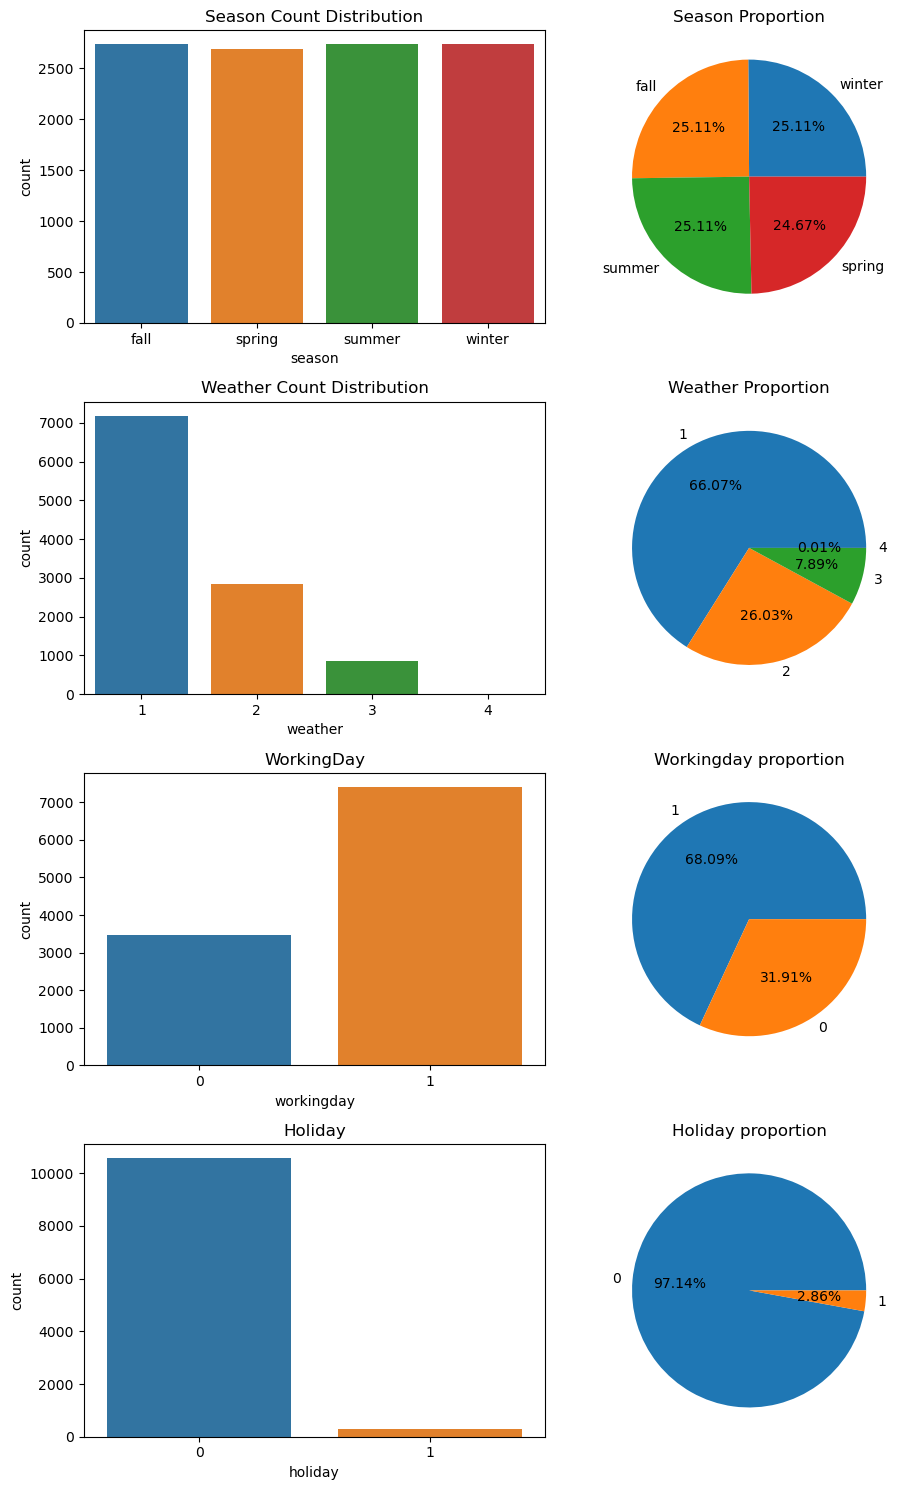

In [12]:
#pie chart Calculations
df_season = df['season'].value_counts(normalize=True).to_frame()
df_season.columns = ['proportion']
df_holiday = df['holiday'].value_counts(normalize=True).to_frame()
df_holiday.columns = ['proportion']
df_workingday = df['workingday'].value_counts(normalize=True).to_frame()
df_workingday.columns = ['proportion']
df_weather = df['weather'].value_counts(normalize=True).to_frame()
df_weather.columns = ['proportion']


fig, ax = plt.subplots(4, 2, figsize=(10, 15))


sns.countplot(data=df, x='season', ax=ax[0, 0])
ax[0, 0].set_title('Season Count Distribution')
ax[0, 1].pie(x=df_season['proportion'], labels=df_season.index, autopct='%.2f%%')
ax[0, 1].set_title('Season Proportion')

sns.countplot(data=df, x='weather', ax=ax[1, 0])
ax[1, 0].set_title('Weather Count Distribution')
ax[1, 1].pie(x=df_weather['proportion'], labels=df_weather.index, autopct='%.2f%%')
ax[1, 1].set_title('Weather Proportion')

sns.countplot(data=df, x='workingday', ax=ax[2, 0])
ax[2, 0].set_title('WorkingDay')
ax[2, 1].pie(x=df_workingday['proportion'], labels=df_workingday.index, autopct='%.2f%%')
ax[2, 1].set_title('Workingday proportion')

sns.countplot(data=df, x='holiday', ax=ax[3, 0])
ax[3, 0].set_title('Holiday')
ax[3, 1].pie(x=df_holiday['proportion'], labels=df_holiday.index, autopct='%.2f%%')
ax[3, 1].set_title('Holiday proportion')

plt.tight_layout()
plt.show()

### Observations
 - Number of rented bikes are approximately similar across all the seasons
 - Number of rented bikes decreases as the weather pattern changes from 1 to 4 which signifies a pattern that when the rainfall amount increases we could see there is a decrease in count of rented bikes 
 - Number of rented bikes are significantly higher in working days compared to weekend or holidays

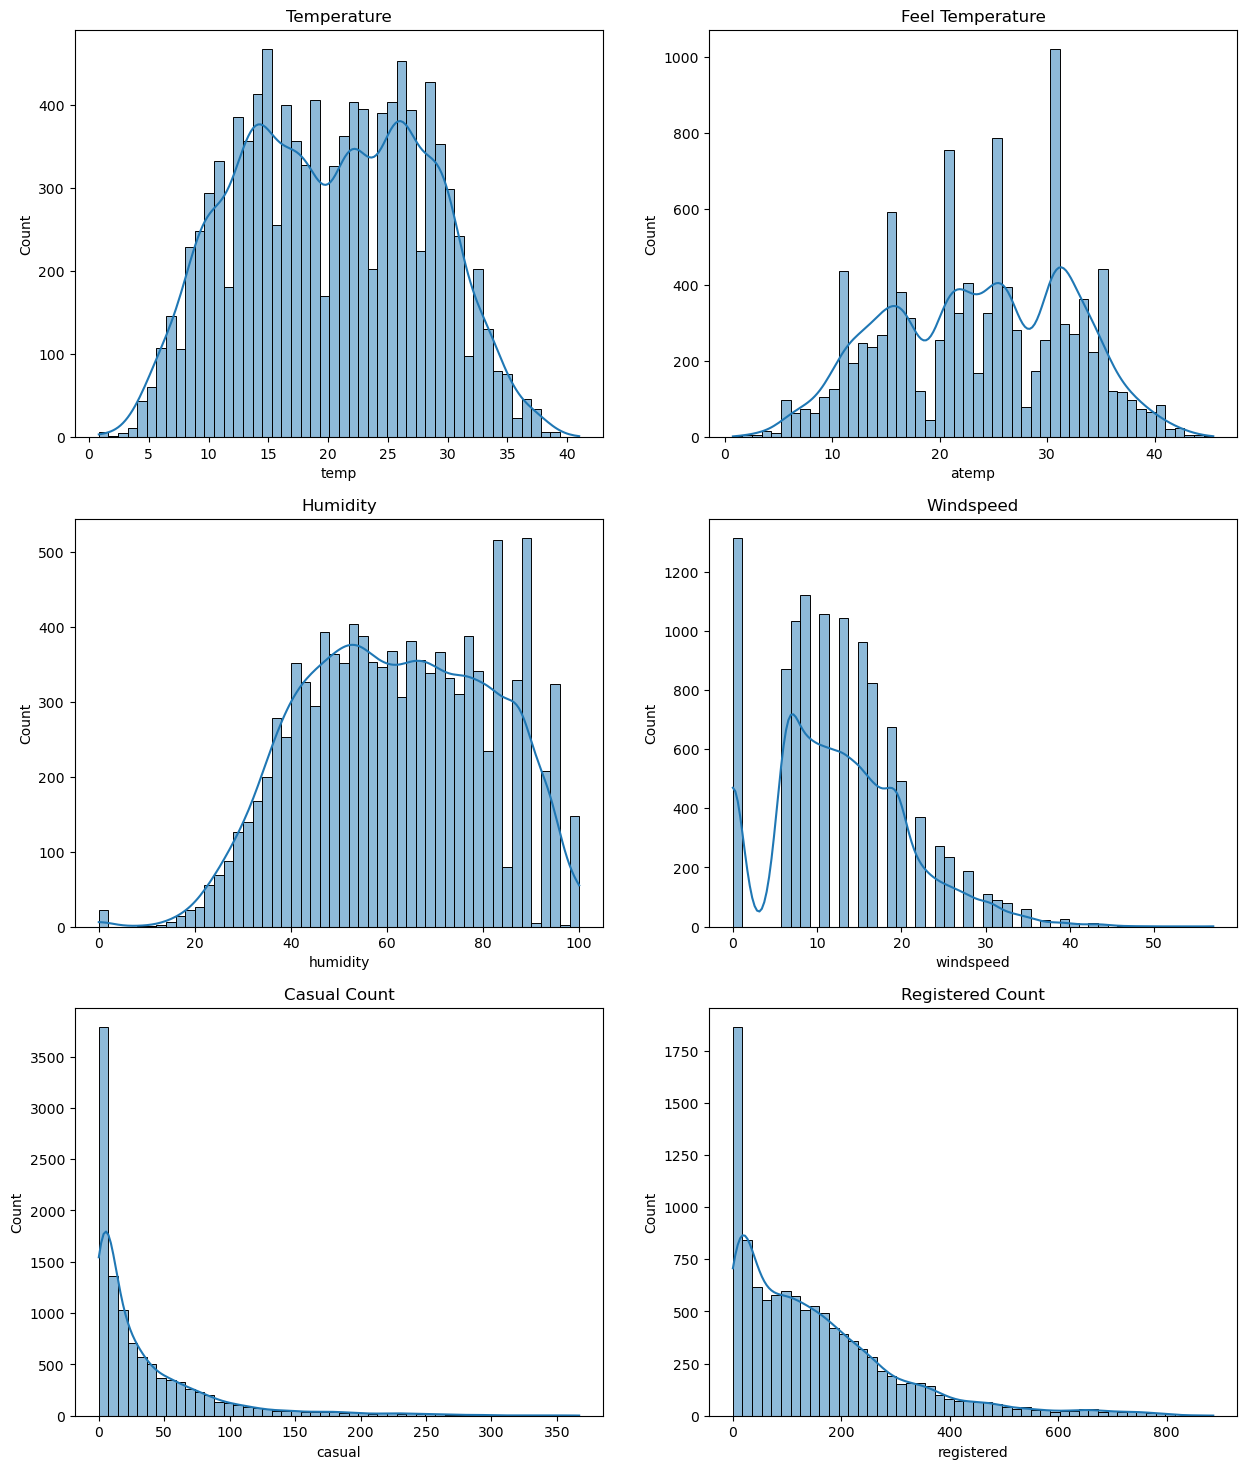

In [13]:
fig, ax = plt.subplots(3,2,figsize=(15,18))

sns.histplot(data=df, x='temp',kde=True,bins=50,ax=ax[0,0])
ax[0, 0].set_title('Temperature')

sns.histplot(data=df, x='atemp',kde=True,bins=50,ax=ax[0,1])
ax[0, 1].set_title('Feel Temperature')

sns.histplot(data=df, x='humidity',kde=True,bins=50,ax=ax[1,0])
ax[1, 0].set_title('Humidity')

sns.histplot(data=df, x='windspeed',kde=True,bins=50,ax=ax[1,1])
ax[1, 1].set_title('Windspeed')

sns.histplot(data=df, x='casual',kde=True,bins=50,ax=ax[2,0])
ax[2, 0].set_title('Casual Count')

sns.histplot(data=df, x='registered',kde=True,bins=50,ax=ax[2,1])
ax[2, 1].set_title('Registered Count')

plt.show()

### Observations:
 - As extremes of the temperature or feel temperature  or humidity we could see the decrease of rented bikes 

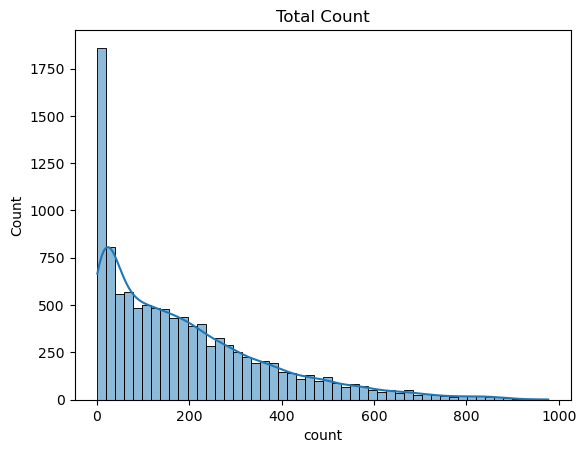

In [14]:
sns.histplot(data=df, x='count',kde=True,bins=50)
plt.title('Total Count')
plt.show()

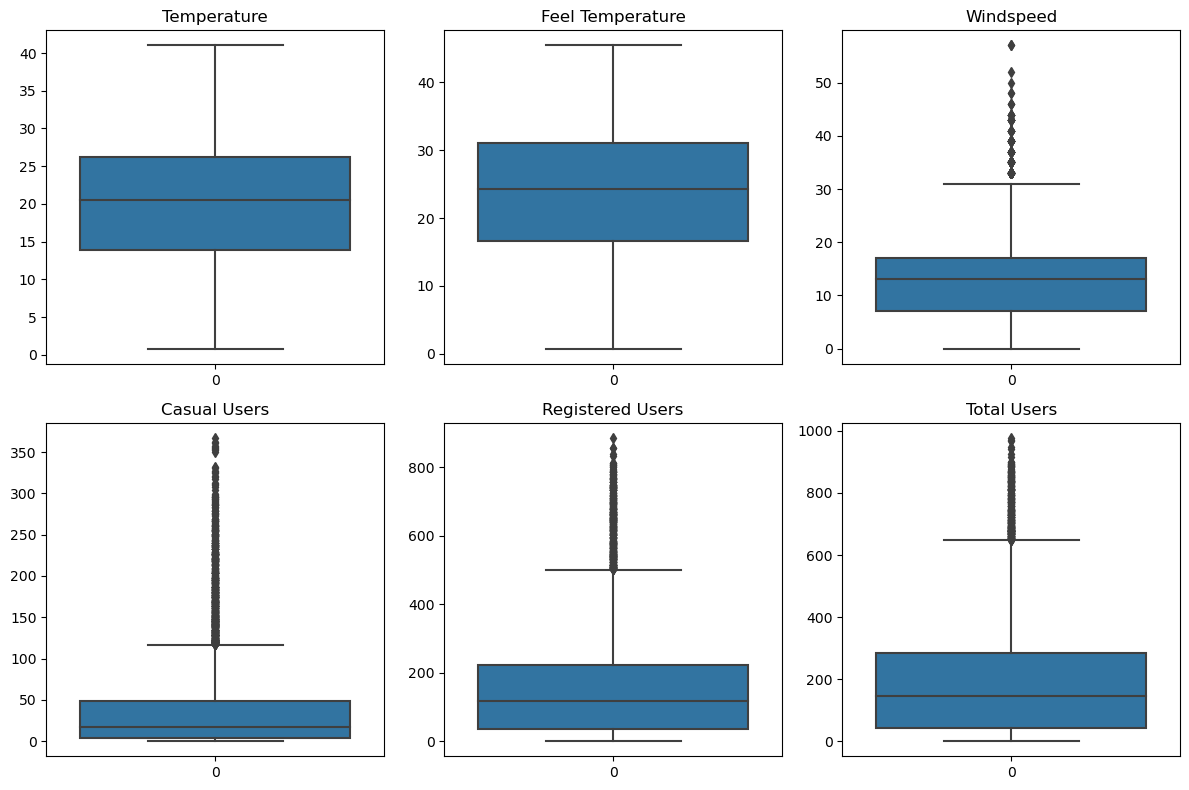

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

sns.boxplot(ax=axes[0,0], data=df['temp'])
axes[0,0].set_title('Temperature')

sns.boxplot(ax=axes[0,1], data=df['atemp'])
axes[0,1].set_title('Feel Temperature')

sns.boxplot(ax=axes[0,2], data=df['windspeed'])
axes[0,2].set_title('Windspeed')

sns.boxplot(ax=axes[1,0], data=df['casual'])
axes[1,0].set_title('Casual Users')

sns.boxplot(ax=axes[1,1], data=df['registered'])
axes[1,1].set_title('Registered Users')

sns.boxplot(ax=axes[1,2], data=df['count'])
axes[1,2].set_title('Total Users')

plt.tight_layout()
plt.show()

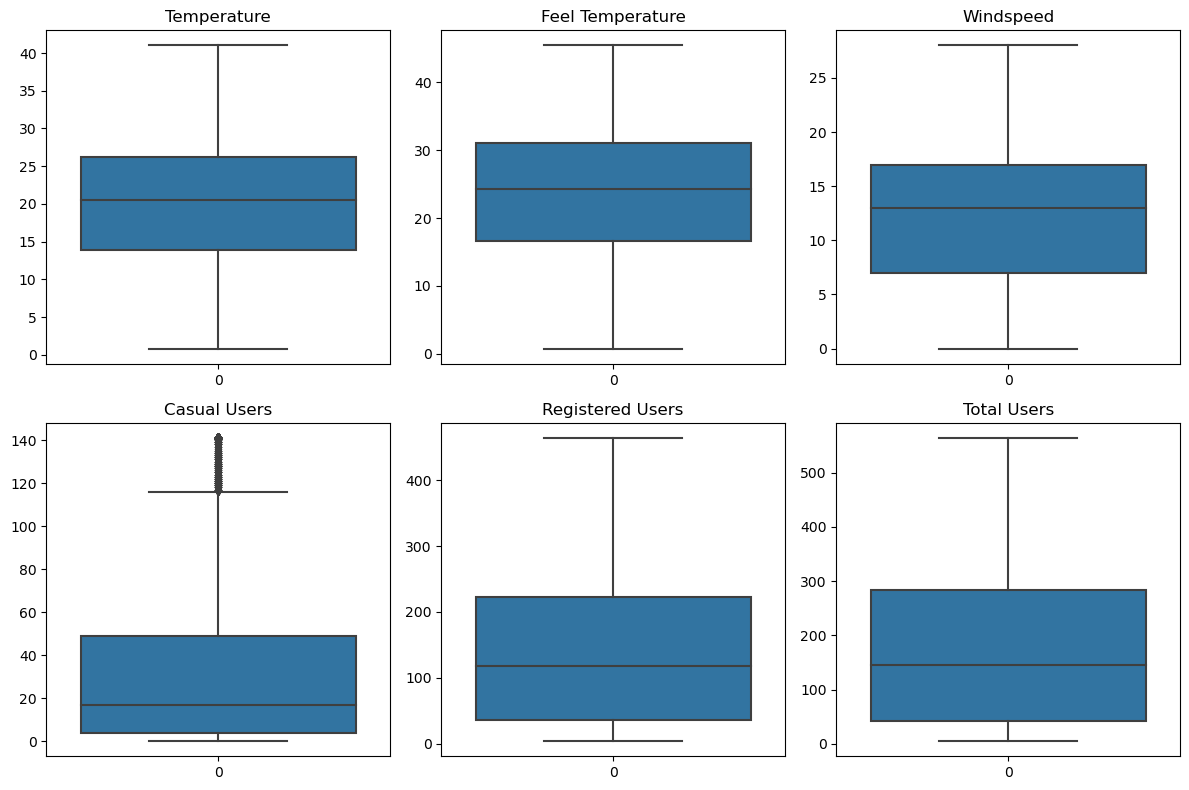

In [16]:
outlier_col = ['windspeed','casual','registered','count']

for i in outlier_col:
    lower_bound = df[i].quantile(0.05)  # 5th percentile
    upper_bound = df[i].quantile(0.95)  # 95th percentile
    df[i] = df[i].clip(lower=lower_bound, upper=upper_bound)
    
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

sns.boxplot(ax=axes[0,0], data=df['temp'])
axes[0,0].set_title('Temperature')

sns.boxplot(ax=axes[0,1], data=df['atemp'])
axes[0,1].set_title('Feel Temperature')

sns.boxplot(ax=axes[0,2], data=df['windspeed'])
axes[0,2].set_title('Windspeed')

sns.boxplot(ax=axes[1,0], data=df['casual'])
axes[1,0].set_title('Casual Users')

sns.boxplot(ax=axes[1,1], data=df['registered'])
axes[1,1].set_title('Registered Users')

sns.boxplot(ax=axes[1,2], data=df['count'])
axes[1,2].set_title('Total Users')

plt.tight_layout()
plt.show()

### Observations

- Casual users are lower in count when compared to the registered users
- Fell temperature mean is higher compared to actual temperature 

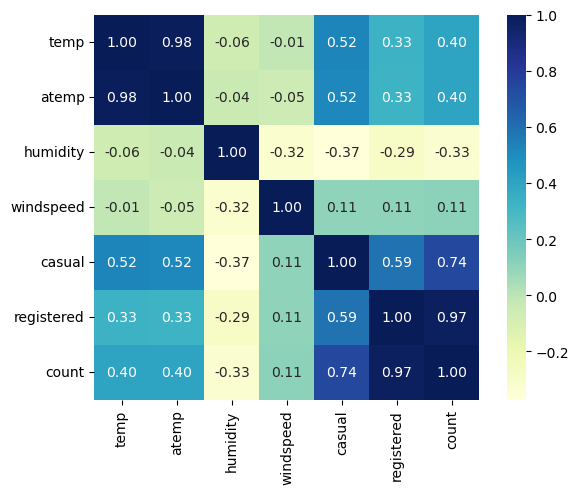

In [17]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(7, 5)) 
sns.heatmap(numeric_df.corr(), cmap="YlGnBu", square=True, annot=True, fmt=".2f")
plt.show()

### Observations
- Temperature and Feel Temperature have high correlation as expected
- Registered count of Users and Total count of Users have high correlation

### Bivariate Analysis

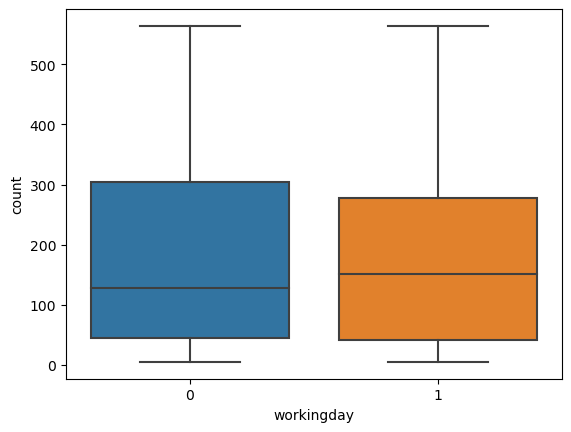

In [18]:
sns.boxplot(data=df, x='workingday', y='count')
plt.show()

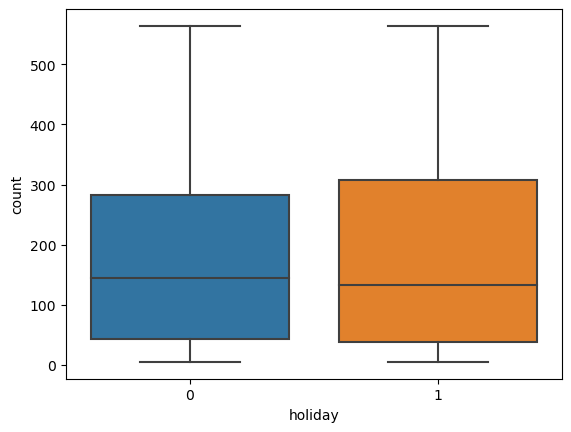

In [19]:
sns.boxplot(data=df, x='holiday', y='count')
plt.show()

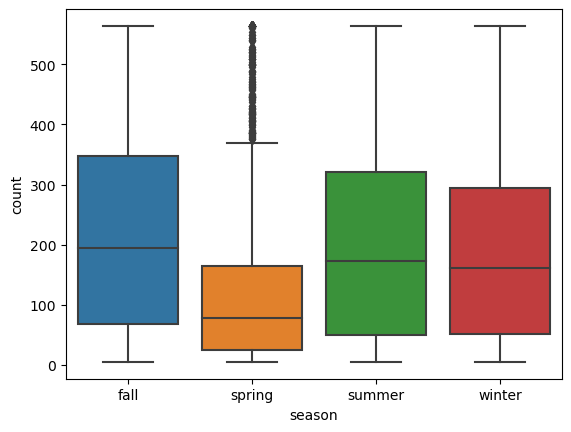

In [20]:
sns.boxplot(data=df, x='season', y='count')
plt.show()

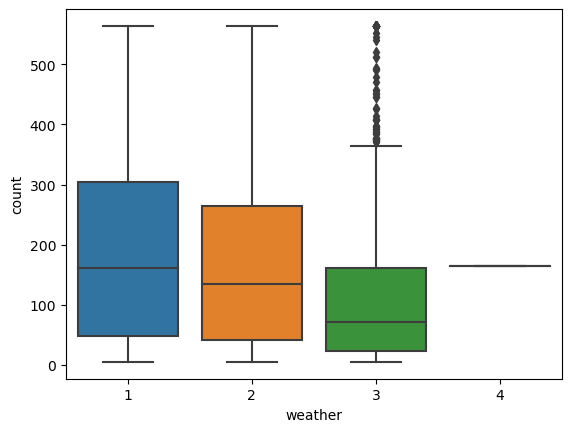

In [21]:
sns.boxplot(data=df, x='weather', y='count')
plt.show()

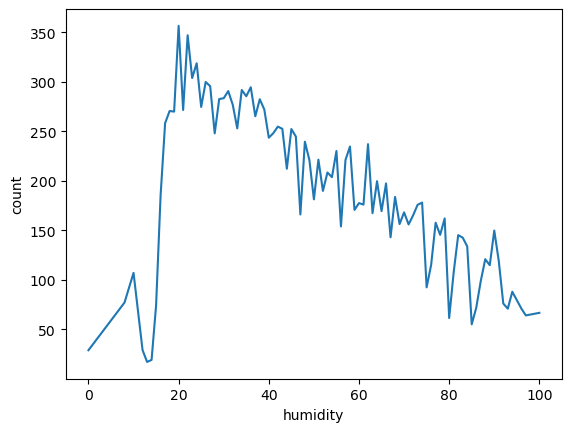

In [22]:
sns.lineplot(data=df,x='humidity',y='count',errorbar=None)
plt.show()

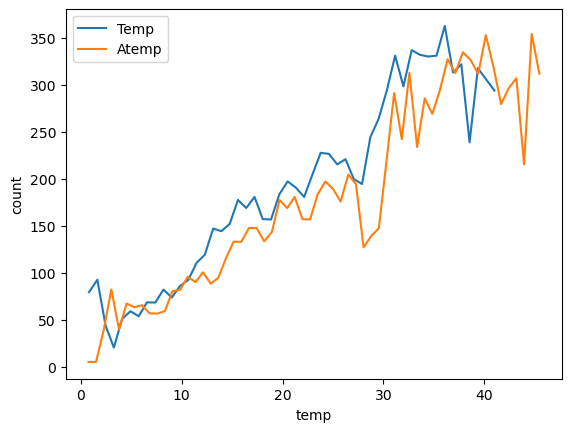

In [23]:
sns.lineplot(data=df, x='temp', y='count', label='Temp',errorbar=None)
sns.lineplot(data=df, x='atemp', y='count', label='Atemp',errorbar=None)
plt.show()

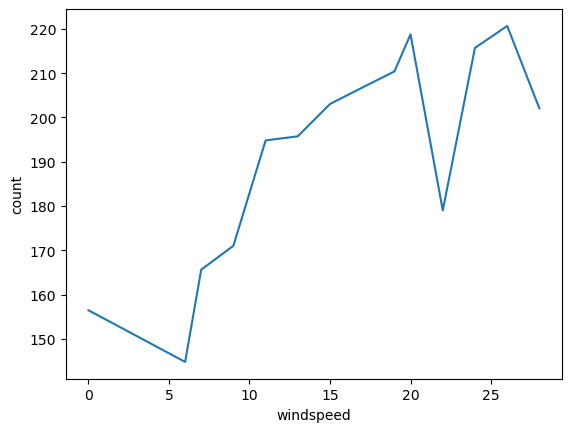

In [24]:
sns.lineplot(data=df, x='windspeed', y='count',errorbar=None)
plt.show()

### Check if there any significant difference between the no. of bike rides on Working days and Holidays?

In [25]:
# Ho --> There is no significant difference between no. of bike rides on Working days and Holidays 
# Ha --> There is a significant difference between no. of bike rides on Working days and Holidays  

# Since there is only two types in Categorical Column and it needs to be compared with a numerical column --> "T-test"

# Siginificance value (alpha) = 0.05

In [26]:
from scipy.stats import ttest_ind

working_day = df[df['workingday']==1]['count']
holiday = df[df['workingday']==0]['count']

tstatic,pval = ttest_ind(working_day,holiday)
tstatic, pval

(-0.08185262080655475, 0.934765416165105)

In [27]:
if (pval<0.05):
    print("Reject the Ho \nThere is a significant difference between no. of bike rides on Working days and Holidays")
else:
    print("Failed to Reject Ho \nThere is no significant difference between no. of bike rides on Working days and Holidays")

Failed to Reject Ho 
There is no significant difference between no. of bike rides on Working days and Holidays


### Conclusion:

  There is no dependence between workingday or holidays with number of bike rides which means irrespective of the type of day bike rides are same

### Check if the demand of bicycles on rent is the same for different Weather conditions?

In [28]:
# Ho --> Demand of bicycles on rent is same for all weather conditions
# Ha --> Demand of bicycles on rent significantly dependent of weather conditions

# Since the categorical column with more than two types of category is compared with numberical columns --> Annova Test

# Siginificance value (alpha) = 0.05

# Assumptions of Annova Test
#  - Data should be Normally distributed (Test this with qqplot or Shapiro Wilk test)
#  - Equal variance across the group (Levene's Test)

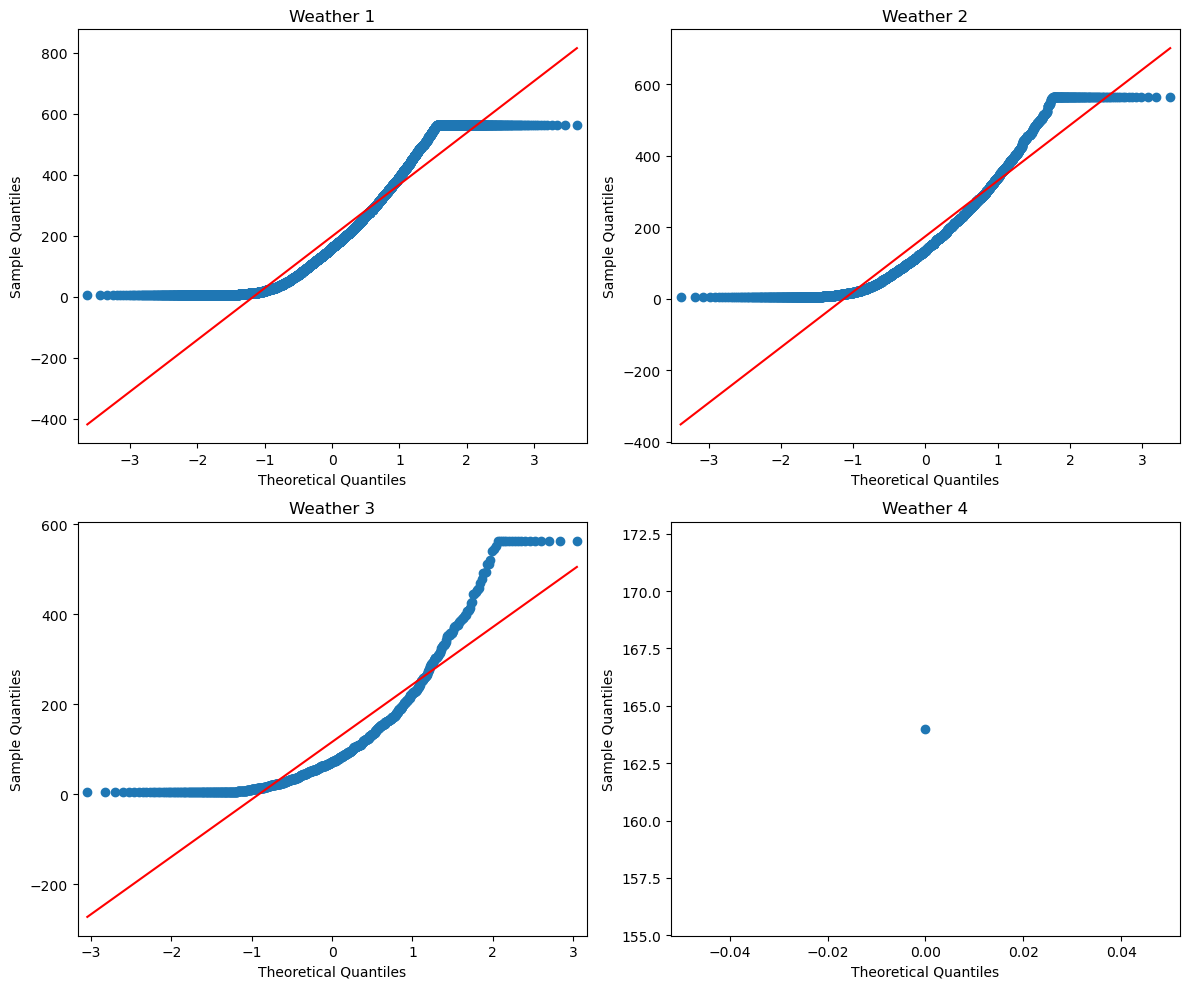

In [29]:
from scipy.stats import f_oneway, shapiro, levene
from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

data1 = df[df['weather'] == 1]['count']
data2 = df[df['weather'] == 2]['count']
data3 = df[df['weather'] == 3]['count']
data4 = df[df['weather'] == 4]['count']

# Generating QQ plots for each weather condition
qqplot(data1, line='s', ax=ax[0, 0])
ax[0, 0].set_title('Weather 1')

qqplot(data2, line='s', ax=ax[0, 1])
ax[0, 1].set_title('Weather 2')

qqplot(data3, line='s', ax=ax[1, 0])
ax[1, 0].set_title('Weather 3')

qqplot(data4, line='s', ax=ax[1, 1])
ax[1, 1].set_title('Weather 4')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [30]:
df.weather.value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [31]:
# Since we have only one value for weather type 4 we have a dot for qqplot

In [32]:
# Since we couldn't conclude with normality of the data with qqplot we will go with statistical way of Shapiro Wilk Test

test,pval = shapiro(data1)
print(f"pval for weather type1: {pval}")
test,pval = shapiro(data2)
print(f"pval for weather type2: {pval}")
test,pval = shapiro(data3)
print(f"pval for weather type3: {pval}")
# test,pval = shapiro(data4)                 --> Throws error as minimum val for shapiro test is 3 and we have 1 value
# print(f"pval for weather type1: {pval}")

pval for weather type1: 0.0
pval for weather type2: 1.0249377227764577e-40
pval for weather type3: 2.300214398655157e-31


C:\Users\shriv\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [33]:
# Since all the p_value are less than 0.05 we can say this data is not normal or gaussian distribution

In [34]:
# Test for same variance between group with levene's Test

test, pval = levene(data1,data2,data3,data4)
test, pval

(63.561909332553384, 9.825185817580428e-41)

In [35]:
# Since the p_value are less than 0.05 we can say this data doesn't have same variance across with all the groups 

In [36]:
# Annova Test

fstats,pval = f_oneway(data1,data2,data3,data4)
fstats,pval

(70.17341079305406, 6.083863264395891e-45)

In [37]:
# Since Annova Test complaince actually failed we need to test with Kruskal Wallis Test to confirm it

from scipy.stats import kruskal 

kstat,pval = kruskal (data1,data2,data3,data4)
kstat,pval

(204.7853967605586, 3.900417263983396e-44)

In [38]:
if (pval<0.05):
    print("Reject the Ho \nDemand of bicycles on rent significantly dependent of weather conditions")
else:
     print("Failed to Reject Ho \nDemand of bicycles on rent is same for all weather conditions")

Reject the Ho 
Demand of bicycles on rent significantly dependent of weather conditions


### Conclusion:

  The demand of the bicycles is dependent of weather conditions

### Check if the demand of bicycles on rent is the same for different Seasons?

In [39]:
# Ho --> Demand of bicycles on rent is same for all season type
# Ha --> Demand of bicycles on rent significantly dependent of season type

# Since the categorical column with more than two types of category is compared with numberical columns --> Annova Test

# Siginificance value (alpha) = 0.05

# Assumptions of Annova Test
#  - Data should be Normally distributed (Test this with qqplot or Shapiro Wilk test)
#  - Equal variance across the group (Levene's Test)

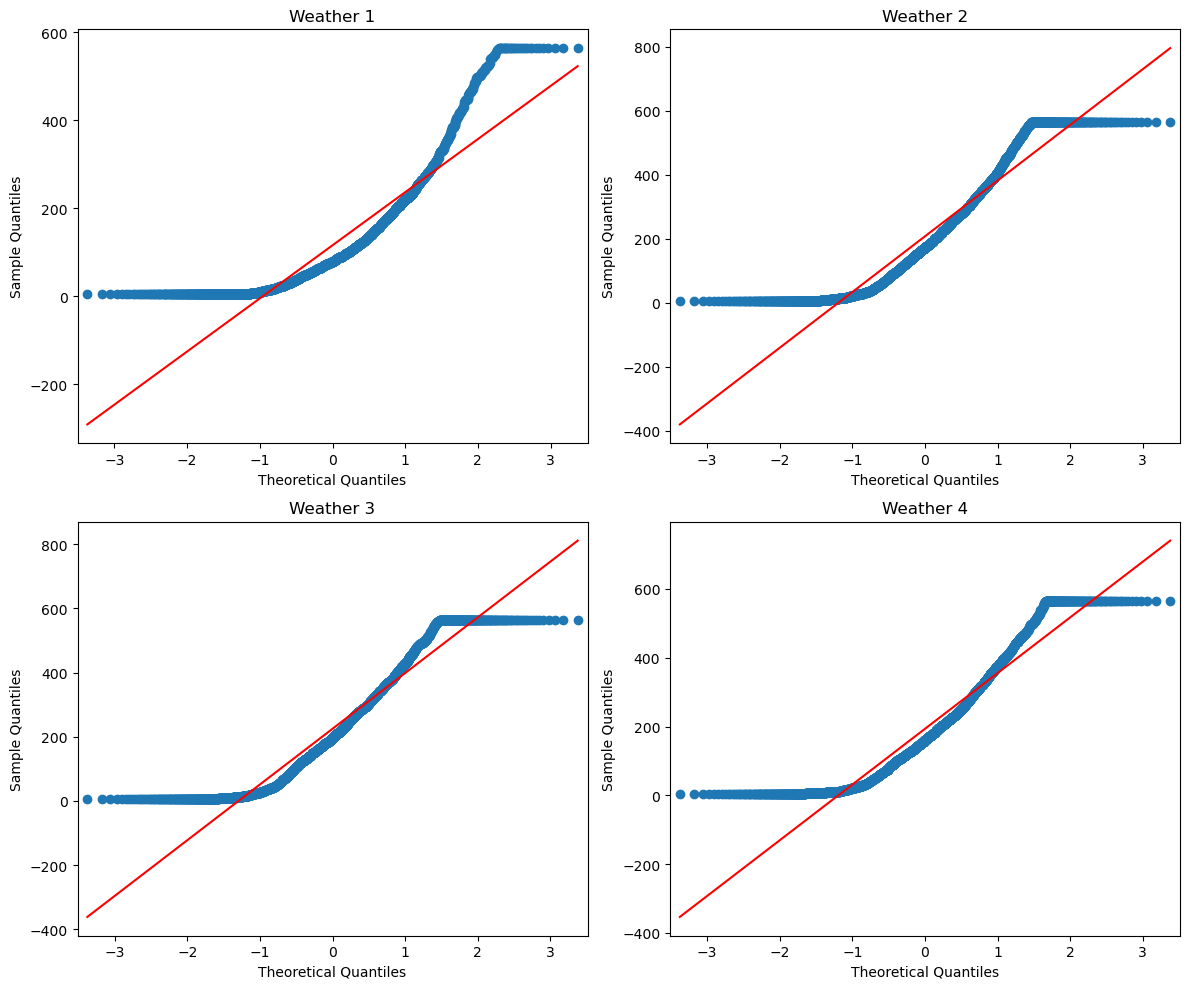

In [40]:
from scipy.stats import f_oneway, shapiro, levene
from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

data1 = df[df['season'] == 'spring']['count']
data2 = df[df['season'] == 'summer']['count']
data3 = df[df['season'] == 'fall']['count']
data4 = df[df['season'] == 'winter']['count']

# Generating QQ plots for each weather condition
qqplot(data1, line='s', ax=ax[0, 0])
ax[0, 0].set_title('Weather 1')

qqplot(data2, line='s', ax=ax[0, 1])
ax[0, 1].set_title('Weather 2')

qqplot(data3, line='s', ax=ax[1, 0])
ax[1, 0].set_title('Weather 3')

qqplot(data4, line='s', ax=ax[1, 1])
ax[1, 1].set_title('Weather 4')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [41]:
# Since we couldn't conclude with normality of the data with qqplot we will go with statistical way of Shapiro Wilk Test

test,pval = shapiro(data1)
print(f"pval for weather type1: {pval}")
test,pval = shapiro(data2)
print(f"pval for weather type2: {pval}")
test,pval = shapiro(data3)
print(f"pval for weather type3: {pval}")
test,pval = shapiro(data4)                 
print(f"pval for weather type4: {pval}")

pval for weather type1: 0.0
pval for weather type2: 1.898688093068293e-38
pval for weather type3: 4.392293760948129e-35
pval for weather type4: 1.2844254640372872e-37


In [42]:
# Since all the p_value are less than 0.05 we can say this data is not normal or gaussian distribution

In [43]:
# Test for same variance between group with levene's Test

test, pval = levene(data1,data2,data3,data4)
test, pval

(209.56811291531554, 3.684749131629985e-132)

In [44]:
# Since the p_value are less than 0.05 we can say this data doesn't have same variance across with all the groups 

In [45]:
# Annova Test 
fstats,pval = f_oneway(data1,data2,data3,data4)
fstats,pval

(247.72532786423764, 1.648284086756556e-155)

In [46]:
# Since Annova Test complaince actually failed we need to test with Kruskal Wallis Test to confirm it

kstat,pval = kruskal (data1,data2,data3,data4)
kstat,pval

(690.4515233888959, 2.4688288437668016e-149)

In [47]:
if (pval<0.05):
    print("Reject the Ho \nDemand of bicycles on rent significantly dependent of season types")
else:
     print("Failed to Reject Ho \nDemand of bicycles on rent is same for all season types")

Reject the Ho 
Demand of bicycles on rent significantly dependent of season types


### Conclusion:

  The demand of the bicycles is dependent of seasons

 ### Check if the Weather conditions are significantly different during different Seasons?

In [48]:
# Ho --> Weather conditions and Seasons types are independent of each other
# Ha --> Weather conditions and Seasons types are significantly dependent on each other 

# Since two categorical columns are compared with each other --> ChiSquare Test

# Significance value (alpha) = 0.05

In [49]:
val = pd.crosstab(index=df['weather'],columns=df['season'])
val

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


In [50]:
from scipy.stats import chi2_contingency

chistat,pval,dof,expec_freq = chi2_contingency(val)
chistat,pval,dof,expec_freq

(49.15865559689363,
 1.5499250736864862e-07,
 9,
 array([[1.80559765e+03, 1.77454639e+03, 1.80559765e+03, 1.80625831e+03],
        [7.11493845e+02, 6.99258130e+02, 7.11493845e+02, 7.11754180e+02],
        [2.15657450e+02, 2.11948742e+02, 2.15657450e+02, 2.15736359e+02],
        [2.51056403e-01, 2.46738931e-01, 2.51056403e-01, 2.51148264e-01]]))

In [51]:
if (pval<0.05):
    print("Reject the Ho \nWeather conditions and Seasons types are significantly dependent on each other")
else:
     print("Failed to Reject Ho \nWeather conditions and Seasons types are independent of each other")

Reject the Ho 
Weather conditions and Seasons types are significantly dependent on each other


### Conclusion:

  Weather conditions and Season types are significantly dependent on each other

### Summary of Hypothesis:
#### Weather conditions and Season types are significantly dependent on each other ?
 - There is no dependence between workingday or holidays with number of bike rides which means irrespective of the type of day bike rides are same
#### Check if the demand of bicycles on rent is the same for different Weather conditions ? 
 - The demand of the bicycles is dependent of weather conditions
#### Check if the demand of bicycles on rent is the same for different Seasons ?
 - The demand of the bicycles is dependent of seasons
#### Check if the Weather conditions are significantly different during different Seasons ?
 - Weather conditions and Season types are significantly dependent on each other

### Recommendations
- **Seasonal Marketing Focus** : Promote bike rentals aggressively during spring and summer, leveraging peak demand.

- **Seasonal Incentives**: Offer exclusive packages or discounts during high-demand seasons to boost rentals.

- **Weather-based Campaigns**: Launch promotions during clear or partly cloudy days when rentals are highest.

- **Weather-specific Discounts**: Provide special discounts on favorable weather days to attract more customers.
- **Enhanced Weather Data Collection**: Improve data gathering for extreme weather events to better understand customer behavior and adapt offerings, such as specialized bikes or safety measures.

- **Customer Comfort Enhancements**: With high humidity and moderate temperatures, offer amenities like umbrellas, rain jackets, or water bottles to enhance the biking experience and foster customer loyalty.